# EDA

### Importing and reading the data file

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
import os
Base_dir = "../data/raw/"
df = pd.read_csv(os.path.join(Base_dir, "train.csv"))


In [11]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


### Data Statistics

In [12]:
print(f"Number of rows: {df_1.shape[0]}")
print(f"Number of columns: {df_1.shape[1]}")

Number of rows: 159571
Number of columns: 8


In [13]:
from sklearn.model_selection import train_test_split

df_folds, test = train_test_split(
            df, test_size=0.13, random_state=42
        )

In [14]:
print(len(df_folds))
print(len(test))

138826
20745


In [15]:
print(f"Number of missing values in each column: {df.isnull().sum()}")

Number of missing values in each column: id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


So there are 11541 data points, and 2 columns, first is the sentiment column (our target variable), second is the text columns which contains the tweet about the review of the airline.

There is also no missing values.

<AxesSubplot:xlabel='toxic', ylabel='count'>

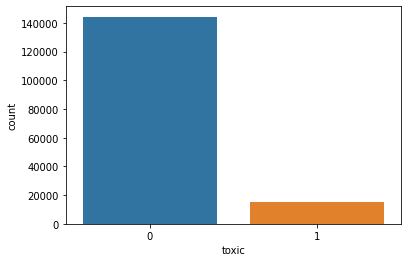

In [17]:
sns.countplot(x='toxic', data=df)

So this is an imbalanced dataset. Thus we might want to choose our metrics a bit carefully.

### Text Analysis

In [20]:
df["text_length"] = df.apply(lambda x: len(x.comment_text.split()), axis=1)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='text_length', ylabel='Density'>

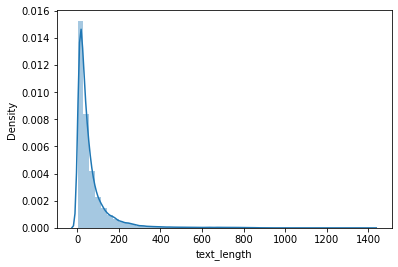

In [21]:
sns.distplot(a=df['text_length'], kde=True, bins=50)

So the 99th percentile of the length of the text is around 216 words.

In [22]:
print(f"Average length of text is {df['text_length'].mean()}")
print(f"Maximum length of text is {df['text_length'].max()}")
print(f"Minimum length of text is {df['text_length'].min()}")

Average length of text is 67.27352714465661
Maximum length of text is 1411
Minimum length of text is 1
